In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn import tree
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
datos = pd.read_csv(
    'https://docs.google.com/spreadsheets/d/1wduqo5WyYmCpaGnE81sLNGU0VSodIekMfpmEwU0fGqs/export?format=csv', low_memory=False
)

resultados = pd.read_csv(
    'https://docs.google.com/spreadsheets/d/1gvZ03uAL6THwd04Y98GtIj6SeAHiKyQY5UisuuyFSUs/export?format=csv', low_memory=False
)

df = pd.merge(datos, resultados, how='left', left_on='id', right_on='id')
df

,barrio,dia,direccion_viento_tarde,direccion_viento_temprano,horas_de_sol,humedad_tarde,humedad_temprano,id,llovieron_hamburguesas_hoy,mm_evaporados_agua,...,presion_atmosferica_temprano,rafaga_viento_max_direccion,rafaga_viento_max_velocidad,temp_max,temp_min,temperatura_tarde,temperatura_temprano,velocidad_viendo_tarde,velocidad_viendo_temprano,llovieron_hamburguesas_al_dia_siguiente
0,Retiro,2016-10-11,Este,Nornoreste,10.7,59.0,56.0,86942,no,16.0,...,1010.2,Estesureste,33.0,29.2,16.8,24.1,25.3,19.0,4.0,no
1,Vélez Sársfield,2016-03-28,Sur,suroeste,0.0,49.0,83.0,102098,no,2.6,...,1021.4,Sur,31.0,16.9,10.6,16.4,12.3,13.0,7.0,no
2,Palermo,2017-05-11,Sursureste,Norte,4.3,59.0,83.0,67154,no,2.4,...,1026.5,Norte,26.0,16.6,4.4,15.7,9.4,9.0,13.0,no
3,Mataderos,2012-05-07,suroeste,Sur,NaN,67.0,93.0,50245,no,NaN,...,1020.0,Oestesuroeste,13.0,11.4,0.8,11.1,4.0,6.0,6.0,no
4,Recoleta,2014-06-19,Nornoreste,Nornoreste,0.8,94.0,97.0,82904,no,0.8,...,1021.9,Nornoreste,33.0,11.6,6.7,11.2,8.8,11.0,15.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116363,Villa Lugano,2011-03-07,Oestesuroeste,Sureste,11.6,35.0,44.0,118424,no,8.4,...,1015.9,suroeste,43.0,28.7,17.4,27.8,23.0,30.0,11.0,no
116364,Saavedra,2009-07-25,Sureste,Sursureste,1.0,68.0,80.0,87436,no,7.4,...,1018.2,Sureste,44.0,26.3,19.0,24.0,21.9,30.0,19.0,si
116365,Villa General Mitre,2013-11-11,suroeste,Sur,11.1,19.0,43.0,116306,no,NaN,...,1014.4,Oestesuroeste,35.0,34.5,10.2,32.8,24.2,24.0,9.0,no
116366,Villa Devoto,2010-08-17,Sursuroeste,NaN,NaN,71.0,99.0,112204,no,NaN,...,1005.2,Sursuroeste,43.0,16.5,5.0,13.6,11.4,26.0,0.0,si


#División de los datos

In [3]:
df = df.dropna(subset=['llovieron_hamburguesas_al_dia_siguiente'])
df.reset_index()

datos_1 = df.iloc[:, :23]
resultados_1 = df.iloc[:,23:]

X_training_val_dev, X_test_holdout, y_training_val_dev, y_test_holdout = train_test_split(
    datos_1, resultados_1, random_state=117, test_size=0.1, stratify=resultados_1
)
X_training, X_val_dev, y_training, y_val_dev = train_test_split(
    X_training_val_dev, y_training_val_dev, random_state=117, test_size=0.2, stratify=y_training_val_dev
)


print("Shape of new dataframes - {} , {}".format(X_training.shape, y_training.shape))
datos_training = X_training.copy()
datos_test_holdout = X_test_holdout.copy()
datos_training

Shape of new dataframes - (81884, 23) , (81884, 1)


,barrio,dia,direccion_viento_tarde,direccion_viento_temprano,horas_de_sol,humedad_tarde,humedad_temprano,id,llovieron_hamburguesas_hoy,mm_evaporados_agua,...,presion_atmosferica_tarde,presion_atmosferica_temprano,rafaga_viento_max_direccion,rafaga_viento_max_velocidad,temp_max,temp_min,temperatura_tarde,temperatura_temprano,velocidad_viendo_tarde,velocidad_viendo_temprano
39061,Parque Patricios,2012-08-05,Oestesuroeste,Noroeste,5.8,69.0,82.0,76262,si,0.0,...,1006.8,1005.1,Oeste,83.0,12.5,8.3,9.5,10.3,50.0,24.0
35264,Belgrano,2014-06-14,Oeste,Noroeste,NaN,76.0,97.0,13968,NaN,NaN,...,1013.6,1015.7,Oeste,28.0,16.7,13.0,15.8,13.2,13.0,9.0
61356,Recoleta,2009-08-29,Oestesuroeste,Oeste,1.5,94.0,97.0,81238,si,1.4,...,999.6,999.9,Oeste,57.0,13.8,10.5,10.1,10.7,28.0,7.0
65160,Villa General Mitre,2011-05-29,Nornoreste,Nornoreste,6.6,28.0,34.0,115468,NaN,NaN,...,1011.3,1014.7,Nornoreste,54.0,25.8,7.5,24.9,19.9,37.0,7.0
84508,Chacarita,2015-02-21,Este,Este,11.1,58.0,67.0,23272,no,8.0,...,1017.2,1019.3,Este,50.0,26.1,20.4,24.3,22.7,35.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26036,Almagro,2014-01-14,Nornoreste,Norte,NaN,33.0,62.0,4790,no,NaN,...,1018.1,1022.1,Estenoreste,35.0,33.9,14.7,32.2,22.4,13.0,13.0
20182,Agronomía,2012-08-21,Noreste,Sureste,NaN,45.0,84.0,1329,no,NaN,...,1015.3,1020.1,Norte,33.0,16.4,2.1,15.6,7.9,19.0,7.0
2036,Parque Patricios,2012-06-05,Sureste,Sursureste,0.9,66.0,63.0,76201,si,0.6,...,1020.6,1019.7,Sureste,59.0,12.6,10.7,12.0,11.6,31.0,30.0
12108,La Paternal,2014-07-30,Oestenoroeste,Noroeste,NaN,34.0,47.0,44525,NaN,NaN,...,1014.2,1017.1,Oestenoroeste,96.0,22.4,12.7,22.2,19.1,19.0,11.0


#preprocessing

In [4]:
from preprocessing import preprocessing_mean

datos_training_svm, datos_val_dev_svm = preprocessing_mean(datos_training.copy(), X_val_dev.copy())

y_training = y_training.reset_index()
y_training = y_training.drop(columns=['index'])
resultados_training_svm = pd.get_dummies(y_training, drop_first=True, columns=['llovieron_hamburguesas_al_dia_siguiente'])
resultados_val_dev_svm = y_val_dev.copy()
resultados_val_dev_svm = pd.get_dummies(y_val_dev, drop_first=True, columns=['llovieron_hamburguesas_al_dia_siguiente'])

datos_training_svm

,dia,horas_de_sol,humedad_tarde,humedad_temprano,mm_evaporados_agua,mm_lluvia_dia,nubosidad_tarde,nubosidad_temprano,presion_atmosferica_tarde,presion_atmosferica_temprano,...,direccion_viento_tarde_1,direccion_viento_tarde_2,direccion_viento_temprano_0,direccion_viento_temprano_1,direccion_viento_temprano_2,rafaga_viento_max_direccion_0,rafaga_viento_max_direccion_1,rafaga_viento_max_direccion_2,año,mes
0,05,5.800000,69.0,82.0,0.000000,6.800000,7.000000,8.000000,1006.799988,1005.1,...,8.0,0.0,-2.0,5.0,-1.0,-2.0,3.0,0.0,2012,08
1,14,7.641429,76.0,97.0,5.466639,2.342146,7.000000,8.000000,1013.599976,1015.7,...,3.0,0.0,-2.0,5.0,-1.0,-2.0,3.0,0.0,2014,06
2,29,1.500000,94.0,97.0,1.400000,6.600000,4.494635,4.431395,999.599976,999.9,...,8.0,0.0,-2.0,3.0,0.0,-2.0,3.0,0.0,2009,08
3,29,6.600000,28.0,34.0,5.466639,2.342146,4.494635,4.431395,1011.299988,1014.7,...,6.0,-1.0,-3.0,6.0,-1.0,-3.0,6.0,-1.0,2011,05
4,21,11.100000,58.0,67.0,8.000000,0.000000,2.000000,3.000000,1017.200012,1019.3,...,1.0,0.0,-1.0,1.0,0.0,-1.0,1.0,0.0,2015,02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81879,14,7.641429,33.0,62.0,5.466639,0.000000,4.494635,4.431395,1018.099976,1022.1,...,6.0,-1.0,-1.0,3.0,-1.0,-4.0,5.0,0.0,2014,01
81880,21,7.641429,45.0,84.0,5.466639,0.000000,1.000000,2.000000,1015.299988,1020.1,...,4.0,-1.0,-3.0,4.0,0.0,-1.0,3.0,-1.0,2012,08
81881,05,0.900000,66.0,63.0,0.600000,11.800000,7.000000,8.000000,1020.599976,1019.7,...,4.0,0.0,-4.0,6.0,0.0,-3.0,4.0,0.0,2012,06
81882,30,7.641429,34.0,47.0,5.466639,2.342146,1.000000,4.431395,1014.200012,1017.1,...,8.0,0.0,-2.0,5.0,-1.0,-5.0,8.0,0.0,2014,07


#Parámetros

In [15]:
params = {'C': np.arange(1,1000,10), 'kernel': ['linear', 'poly', 'rbf'], 'degree': np.arange(1, 4),'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'coef0': np.arange(1,100),  'max_iter': [5000]}

svc = SVC(random_state=117)

rgscv = RandomizedSearchCV(
    svc, params, scoring='roc_auc', n_jobs=-1, cv=5, return_train_score=True, random_state=117
).fit(datos_training_svm, resultados_training_svm.to_numpy())
print(f"Best score: {rgscv.best_score_}")
print(f"Best params {rgscv.best_params_}")

Best score: 0.6463585620431118
Best params {'max_iter': 5000, 'kernel': 'rbf', 'gamma': 0.1, 'degree': 1, 'coef0': 87, 'C': 881}


In [35]:
def kfold(clf, X, y):
  kf = StratifiedKFold(n_splits=5)
  test_accuracies = []
  for fold_idx, (train_index, test_index) in enumerate(kf.split(X,y)):
    clf.fit(X[train_index], y[train_index])
    pred = clf.predict(X[test_index])
    pred[pred <= 0.5] = 0.
    pred[pred > 0.5] = 1.
    test_accuracy = accuracy_score(y[test_index], pred)
    print(f"fold {fold_idx}: accuracy score is {test_accuracy:.4f}")
    test_accuracies.append(test_accuracy)
  print(f"mean test accuracy is: {np.mean(test_accuracies):.4f}")

In [33]:
clf_svm = SVC(
        random_state=117, C= 881, coef0= 87, degree= 1, gamma= 0.1, kernel= 'rbf', max_iter= 5000, probability= True)

In [36]:
kfold(clf_svm, datos_training_svm.to_numpy(), resultados_training_svm.to_numpy())

fold 0: accuracy score is 0.7733
fold 1: accuracy score is 0.7736
fold 2: accuracy score is 0.7731
fold 3: accuracy score is 0.2494
fold 4: accuracy score is 0.7733
mean test accuracy is: 0.6686


#Entrenamiento y predicción Val-Dev

In [17]:
from sklearn.svm import SVC

clf_svm = clf_svm.fit(datos_training_svm, resultados_training_svm)
y_pred_svm = clf_svm.predict(datos_val_dev_svm)
y_pred_proba = clf_svm.predict_proba(datos_val_dev_svm)[:,1]


In [18]:
counter = 0
for i in range(0,len(resultados_val_dev_svm)):
    if resultados_val_dev_svm.to_numpy()[i] == y_pred_svm[i]:
        counter += 1
        
print(counter/len(resultados_val_dev_svm))

0.7719812426729191


#Métricas

In [11]:
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    df_cm = pd.DataFrame(cm)

    plt.figure(dpi=100)
    plt.title("Matriz de confusion")
    sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='g', square=True)
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()

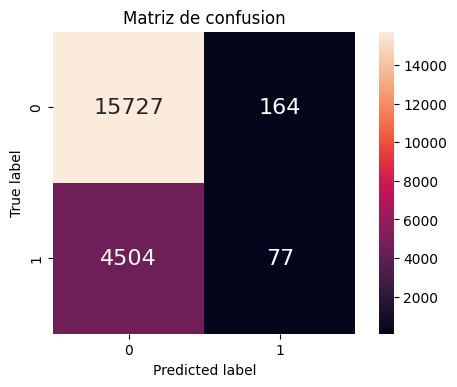

In [20]:
plot_confusion_matrix(resultados_val_dev_svm, y_pred_svm)

In [21]:
print(classification_report(resultados_val_dev_svm, y_pred_svm))

              precision    recall  f1-score   support

           0       0.78      0.99      0.87     15891
           1       0.32      0.02      0.03      4581

    accuracy                           0.77     20472
   macro avg       0.55      0.50      0.45     20472
weighted avg       0.67      0.77      0.68     20472



In [12]:
def plot_roc(_fpr, _tpr, x):

    roc_auc = auc(_fpr, _tpr)

    plt.figure(figsize=(15, 10))
    plt.plot(
        _fpr, _tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})'
    )
    plt.scatter(_fpr, x)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

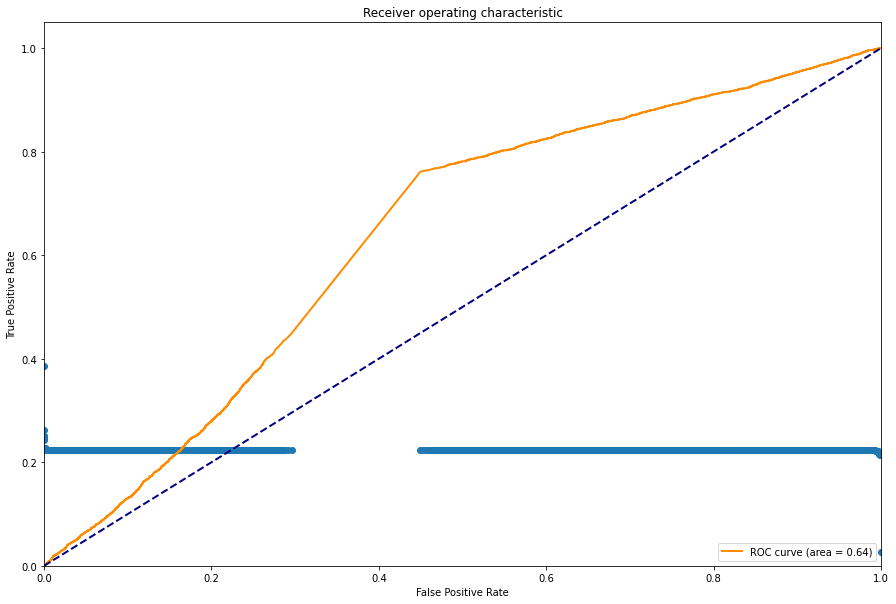

0.6386859984297909

In [23]:
fpr, tpr, thresholds = roc_curve(resultados_val_dev_svm, y_pred_proba)

plot_roc(fpr, tpr, thresholds)
display(roc_auc_score(resultados_val_dev_svm, y_pred_proba))

Este modelo presenta un AUC ROC de 0.64. Intentemos escalando los datos primero.

In [5]:
from preprocessing import preprocessing_mean_scaled

In [16]:
scaled_datos_training_svm, scaled_datos_val_dev_svm = preprocessing_mean_scaled(datos_training.copy(), X_val_dev.copy())

In [17]:
params = {'C': np.arange(1,1000,10), 'kernel': ['linear', 'poly', 'rbf'], 'degree': np.arange(1, 4),'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'coef0': np.arange(1,100),  'max_iter': [5000]}

svc = SVC(random_state=117)

rgscv = RandomizedSearchCV(
    svc, params, scoring='roc_auc', n_jobs=-1, cv=5, return_train_score=True, random_state=117
).fit(scaled_datos_training_svm, resultados_training_svm.to_numpy())
print(f"Best score: {rgscv.best_score_}")
print(f"Best params {rgscv.best_params_}")

Best score: 0.761741991862195
Best params {'max_iter': 5000, 'kernel': 'rbf', 'gamma': 0.1, 'degree': 1, 'coef0': 87, 'C': 881}


In [37]:
clf_svm_2 = SVC(
        random_state=117, C= 881, coef0= 87, degree= 1, gamma= 0.1, kernel= 'rbf', max_iter= 5000, probability= True)

In [38]:
kfold(clf_svm_2, scaled_datos_training_svm, resultados_training_svm.to_numpy())

fold 0: accuracy score is 0.7501
fold 1: accuracy score is 0.7555
fold 2: accuracy score is 0.7578
fold 3: accuracy score is 0.7525
fold 4: accuracy score is 0.7577
mean test accuracy is: 0.7547


In [19]:
clf_svm_2 = clf_svm_2.fit(scaled_datos_training_svm, resultados_training_svm)
y_pred_svm_2 = clf_svm_2.predict(scaled_datos_val_dev_svm)
y_pred_svm_2_proba = clf_svm_2.predict_proba(scaled_datos_val_dev_svm)[:,1]

In [20]:
counter = 0
for i in range(0,len(resultados_val_dev_svm)):
    if resultados_val_dev_svm.to_numpy()[i] == y_pred_svm_2[i]:
        counter += 1
        
print(counter/len(resultados_val_dev_svm))

0.73642047674873


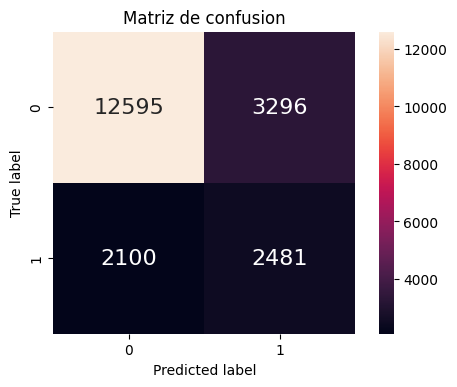

In [21]:
plot_confusion_matrix(resultados_val_dev_svm, y_pred_svm_2)

In [22]:
print(classification_report(resultados_val_dev_svm, y_pred_svm_2))

              precision    recall  f1-score   support

           0       0.86      0.79      0.82     15891
           1       0.43      0.54      0.48      4581

    accuracy                           0.74     20472
   macro avg       0.64      0.67      0.65     20472
weighted avg       0.76      0.74      0.75     20472



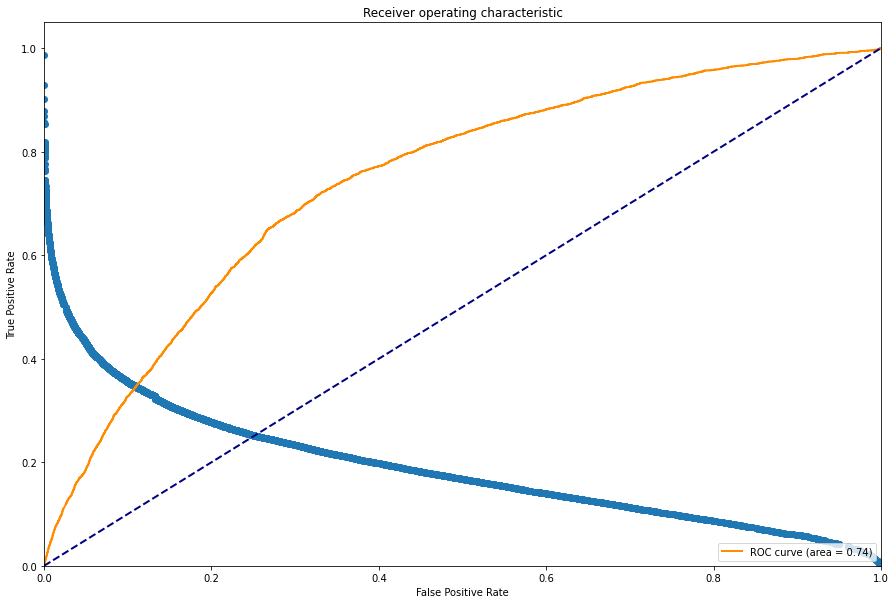

0.7430452211200701

In [23]:
fpr, tpr, thresholds = roc_curve(resultados_val_dev_svm, y_pred_svm_2_proba)

plot_roc(fpr, tpr, thresholds)
display(roc_auc_score(resultados_val_dev_svm, y_pred_svm_2_proba))

Escalando los datos mejoramos significativamente el AUC ROC, por esta razon usaremos este modelo para la predicción final.

#Predicciones sobre el test-holdout

In [24]:
_datos_training, datos_test = preprocessing_mean_scaled(datos_training.copy(), X_test_holdout.copy())

resultados_test = y_test_holdout.copy()
resultados_test = resultados_test.reset_index()
resultados_test = resultados_test.drop(columns=['index'])
resultados_test = pd.get_dummies(resultados_test, drop_first=True, columns=['llovieron_hamburguesas_al_dia_siguiente'])

pd.DataFrame(datos_test)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,-1.100127,0.000000,0.854094,-0.152648,0.000000,-0.279544,0.000000,0.000000,1.159654,1.252738,...,-1.780787,0.511659,1.390148,-1.536646,0.413578,1.424807,-1.546776,0.362647,0.094266,-0.409191
1,1.399270,0.000000,-1.003663,-0.258657,0.000000,-0.279544,0.000000,0.000000,0.321002,0.347837,...,1.596236,0.511659,1.390148,-1.536646,0.413578,0.655193,-0.658764,0.362647,1.274276,1.048628
2,0.944834,2.255794,-0.123673,-0.682692,-0.021138,-0.279544,-1.658719,1.127538,-0.457751,-0.571899,...,1.113805,0.511659,-0.178440,-0.179453,0.413578,-0.114421,-0.214759,0.362647,-1.872418,1.631756
3,1.058443,1.742994,-1.003663,-0.258657,0.993915,-0.279544,0.714517,-1.506275,-0.532631,-0.171369,...,-1.780787,0.511659,-0.178440,0.725342,-1.358462,0.655193,-0.214759,-1.503437,0.487602,-1.283883
4,-0.304864,0.570881,-0.221449,0.271387,-0.465224,-0.279544,-0.234777,0.249600,1.039848,0.852208,...,1.596236,0.511659,-1.747028,1.630137,0.413578,-1.653650,1.561265,0.362647,-0.692408,-1.283883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11368,-1.327345,0.000000,-0.954774,0.271387,0.000000,-0.279544,0.000000,0.000000,1.129700,1.119228,...,-0.333491,0.511659,-0.962734,0.725342,0.413578,-0.114421,-0.214759,0.362647,0.880939,-0.117628
11369,1.626488,0.000000,2.076303,0.536410,0.000000,-0.279544,0.000000,0.000000,-1.835544,-1.580640,...,1.596236,0.511659,-0.178440,0.725342,-1.358462,-1.653650,1.561265,0.362647,-0.692408,-0.117628
11370,-1.554563,-2.798943,0.609653,-0.205653,-0.401783,-0.279544,1.189165,1.127538,0.081381,-0.171369,...,-0.815923,0.511659,1.390148,-1.536646,0.413578,0.655193,-0.658764,0.362647,0.487602,0.757064
11371,1.512879,0.277853,0.316323,1.172463,-1.036192,-0.279544,-0.709425,-0.189369,1.309414,1.237903,...,0.631373,0.511659,0.605854,-1.989043,2.185618,-0.884036,0.673253,0.362647,0.487602,-0.409191


In [25]:
y_pred = clf_svm_2.predict(datos_test)
y_pred_proba = clf_svm_2.predict_proba(datos_test)[:,1]

In [26]:
accuracy_score(y_pred, resultados_test)

0.7260177613646356

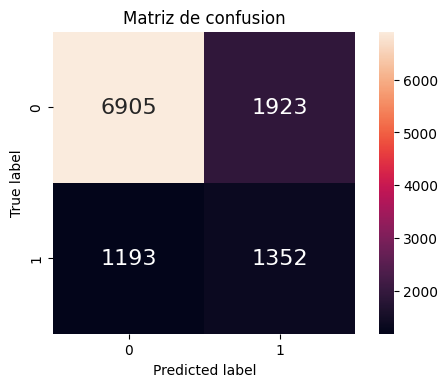

In [27]:
plot_confusion_matrix(resultados_test.to_numpy(), y_pred)

In [28]:
from sklearn.metrics import classification_report

print(classification_report(resultados_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.78      0.82      8828
           1       0.41      0.53      0.46      2545

    accuracy                           0.73     11373
   macro avg       0.63      0.66      0.64     11373
weighted avg       0.75      0.73      0.74     11373



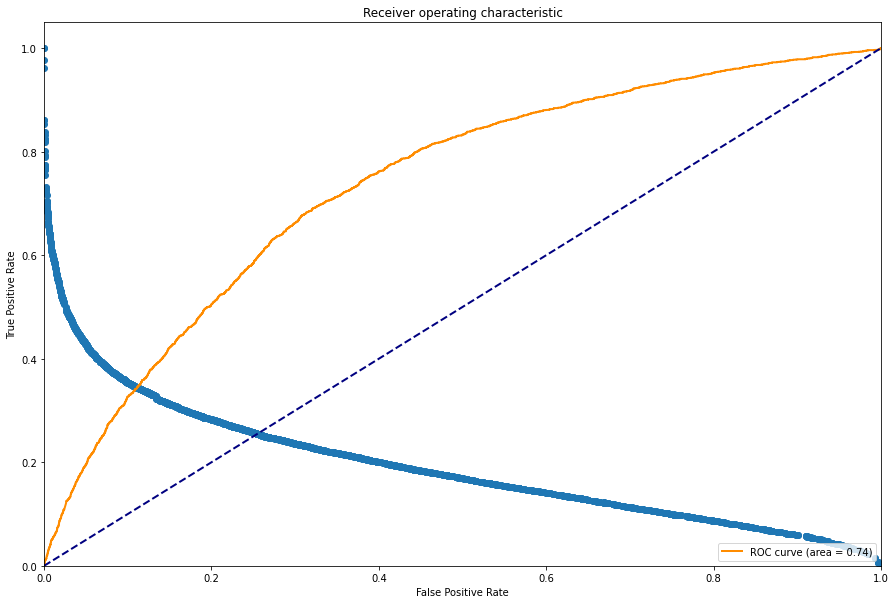

0.735331121819038

In [29]:
fpr, tpr, thresholds = roc_curve(resultados_test.to_numpy(), y_pred_proba)

plot_roc(fpr, tpr, thresholds)
display(roc_auc_score(resultados_test.to_numpy(), y_pred_proba))

#Predicción final

In [30]:
datos_prediccion = pd.read_csv(
    'https://docs.google.com/spreadsheets/d/1mR_JNN0-ceiB5qV42Ff9hznz0HtWaoPF3B9zNGoNPY8/export?format=csv', low_memory=False
)
datos_prediccion

,barrio,dia,direccion_viento_tarde,direccion_viento_temprano,horas_de_sol,humedad_tarde,humedad_temprano,id,llovieron_hamburguesas_hoy,mm_evaporados_agua,...,presion_atmosferica_tarde,presion_atmosferica_temprano,rafaga_viento_max_direccion,rafaga_viento_max_velocidad,temp_max,temp_min,temperatura_tarde,temperatura_temprano,velocidad_viendo_tarde,velocidad_viendo_temprano
0,Villa General Mitre,2014-12-16,Oestesuroeste,Sursureste,13.4,38.0,51.0,116706,NaN,NaN,...,1010.9,1014.4,suroeste,41.0,26.8,8.9,24.9,20.6,28.0,13.0
1,Nueva Pompeya,2010-10-21,Nornoreste,Estesureste,NaN,39.0,57.0,58831,no,NaN,...,1020.2,1023.8,Norte,28.0,23.3,5.0,21.5,14.7,11.0,6.0
2,Constitución,2013-04-09,Estesureste,Oestenoroeste,3.6,73.0,90.0,31981,si,2.4,...,1024.3,1026.7,Oestenoroeste,24.0,22.0,15.6,20.7,16.7,6.0,15.0
3,Agronomía,2016-02-05,Sureste,Sureste,NaN,34.0,47.0,2533,no,NaN,...,1015.8,1018.3,Sureste,30.0,29.9,14.2,27.0,20.0,11.0,15.0
4,Balvanera,2012-06-05,suroeste,Noroeste,NaN,77.0,87.0,7270,no,2.0,...,1007.6,1006.0,suroeste,39.0,11.5,5.5,11.2,7.0,20.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29087,Parque Chas,2013-04-24,suroeste,Oestenoroeste,NaN,71.0,77.0,73456,no,NaN,...,1018.9,1021.2,Oeste,37.0,19.8,9.8,17.3,12.8,9.0,13.0
29088,Belgrano,2015-10-30,Norte,Noreste,NaN,37.0,64.0,14471,no,NaN,...,1017.9,1021.8,Nornoreste,41.0,29.3,15.6,27.8,20.2,15.0,28.0
29089,Villa Crespo,2011-08-09,Nornoreste,Norte,10.1,31.0,77.0,106482,no,3.2,...,1011.1,1016.3,suroeste,41.0,19.8,5.5,18.6,11.1,20.0,11.0
29090,Caballito,2017-04-25,Nornoreste,Norte,NaN,81.0,90.0,21057,no,NaN,...,1008.2,1014.6,Nornoreste,39.0,25.4,17.8,22.0,19.5,33.0,15.0


In [31]:
_datos_training, X = preprocessing_mean_scaled(datos_training.copy(), datos_prediccion)
predicciones_svm = clf_svm_2.predict(X)

predicciones_svm = pd.DataFrame(predicciones_svm).rename(columns= {0:'llovieron_hamburguesas_al_dia_siguiente'})
predicciones_svm.replace(0, 'no', inplace= True)
predicciones_svm.replace(1, 'si', inplace= True)
predicciones_svm

,llovieron_hamburguesas_al_dia_siguiente
0,no
1,no
2,no
3,no
4,si
...,...
29087,si
29088,no
29089,si
29090,no


In [32]:
predicciones_svm.to_csv("SVM.csv")